In this notebook, we will perform Bayesian inference (BI) for tension measurements in pendant drop method. 

First we need to importing the image generation codes and some standard libraries.

In [1]:
# image generation codes
from codes_gendrops_py.genSingleDrop import genSingleDrop

# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# use Latex for the lables in plots
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

# fix the seed for the RNG
RANDOM_SEED=5109
np.random.seed(RANDOM_SEED)


In [2]:
# generate a syntex image 
path=genSingleDrop(sigma=75,volume0=15,rneedle=0.5)



'./s75.00_v15.00_rn0.50.jpg'

Here, we have $$f(x,y)=(2\pi \sigma _1 \sigma _2)^{-1} exp [-\frac{1}{2}(\frac{(x-\mu _1)^2}{\sigma _1 ^2}+\frac{(y-\mu _2)^2}{\sigma _2 ^2})]$$
In this case $x=\sigma$, $y=V_0$

In [59]:

# define the Gaussian prior
def prior(x,y,mean_1,mean_2,sd_1,sd_2):
    a1=((x-mean_1)**2/sd_1**2)
    a2=((y-mean_2)**2/sd_2**2)
    b=(2*np.pi*sd_1*sd_2)
    #print(a1,a2,b)
    return np.exp(-0.5*(a1+a2))/b



In [47]:
prior(70.1,10.1,70,10,0.4,0.5)

0.06249999999999289 0.039999999999999716 1.2566370614359172


0.7560187103450148

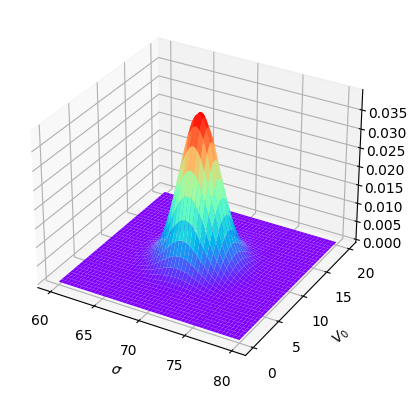

In [75]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fig=plt.figure()
ax3=plt.axes(projection='3d')

mean_prior=np.array([70,10])
sd_prior=np.array([2,2])
etaplot_sigma=np.linspace(60,80,400)
etaplot_v0=np.linspace(0,20,40)


# define 3-d data
x=etaplot_sigma
y=etaplot_v0
X,Y=np.meshgrid(x,y)
Z=prior(X,Y,mean_1=mean_prior[0],mean_2=mean_prior[1],sd_1=sd_prior[0],sd_2=sd_prior[1])

# Drawing
ax3.plot_surface(X,Y,Z,cmap='rainbow')
plt.xlabel('$\\sigma$')
plt.ylabel('$V_0$')
plt.show(block=False)


In [ ]:
# import the likelihood data
